In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install chart_studio
!pip install wordcloud
from chart_studio.plotly import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
from wordcloud import WordCloud, STOPWORDS


In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)


(27481, 4)
(3534, 3)


In [4]:
train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [5]:
train.describe()

textID                                               text  \
count        27481                                              27480   
unique       27481                                              27480   
top     43112b250b  i love the music video of you belong with me b...   
freq             1                                                  1   

       selected_text sentiment  
count          27480     27481  
unique         22463         3  
top             good   neutral  
freq             199     11118

In [6]:
#Looking for missing values

print (train.isnull().sum())
print (test.isnull().sum())

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64
textID       0
text         0
sentiment    0
dtype: int64


In [7]:
# Removing missing values
train.dropna(axis = 0, how ='any',inplace=True) ;

In [8]:
#analysing sentiment data
train['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [9]:
#positive-tweet
print("Positive:",train[train['sentiment']=='positive']['text'].values[0])
#negative-tweet
print("Negative:",train[train['sentiment']=='negative']['text'].values[0])
#neutral-tweet
print("Neutral:",train[train['sentiment']=='neutral']['text'].values[0])

Positive: 2am feedings for the baby are fun when he is all smiles and coos
Negative:  Sooo SAD I will miss you here in San Diego!!!
Neutral:  I`d have responded, if I were going


In [10]:
#evaluating jaccard similarity between selected text and tweet

def Jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

pos=train[train['sentiment']=='positive']["selected_text"].to_numpy()
post=train[train['sentiment']=='positive']["text"].to_numpy()

neg=train[train['sentiment']=='negative']["selected_text"].to_numpy()
negt=train[train['sentiment']=='negative']["text"].to_numpy()

neu=train[train['sentiment']=='neutral']["selected_text"].to_numpy()
neut=train[train['sentiment']=='neutral']["text"].to_numpy()

Positive=0
for i in range(pos.shape[0]):
    Positive=Positive+Jaccard(pos[i], post[i])
    
print(Positive/pos.shape[0]*100)

Negative=0
for i in range(neg.shape[0]):
    Negative=Negative+Jaccard(neg[i], negt[i])
    
print(Negative/neg.shape[0]*100)

Neutral=0
for i in range(neu.shape[0]):
    Neutral=Neutral+Jaccard(neu[i], neut[i])
print(Neutral/neu.shape[0]*100)
    

31.43716500527577
33.86128072742176
97.64446695277988


In [11]:
train['len'] = train['selected_text'].astype(str).apply(len)
train['tweet_len'] = train['text'].astype(str).apply(len)
train['diff'] = train['tweet_len']-train['len']


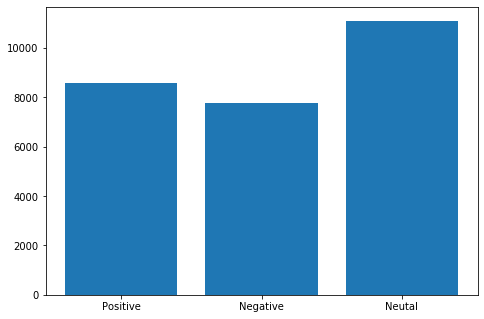

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentiments = ['Positive', 'Negative', 'Neutal']
c=train['sentiment'].value_counts()
#print(c['neutral'])
count = [c['positive'],c['negative'],c['neutral']]
ax.bar(sentiments,count)
plt.show()

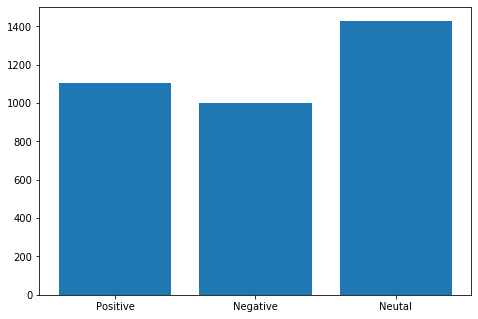

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sentiments = ['Positive', 'Negative', 'Neutal']
c=test['sentiment'].value_counts()
#print(c['neutral'])
count = [c['positive'],c['negative'],c['neutral']]
ax.bar(sentiments,count)
plt.show()

In [14]:
pos = train[train['sentiment']=='positive']
neg = train[train['sentiment']=='negative']
neutral = train[train['sentiment']=='neutral']


Text(0.5, 1.0, 'Selected text length distribution')

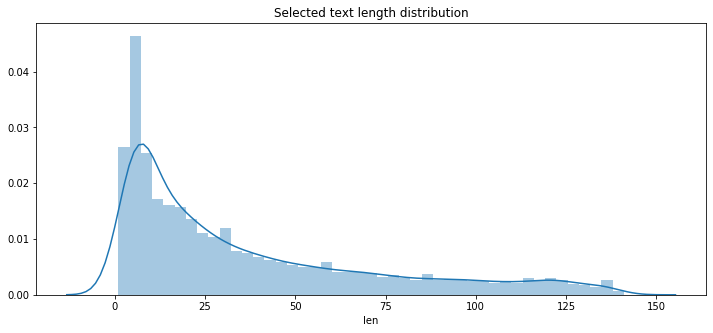

In [15]:
lens = train['len']
plt.figure(figsize=(12, 5));
sns.distplot(lens);
plt.title('Selected text length distribution')

141 3 68.33002183406114


Text(0.5, 1.0, 'Tweet length distribution')

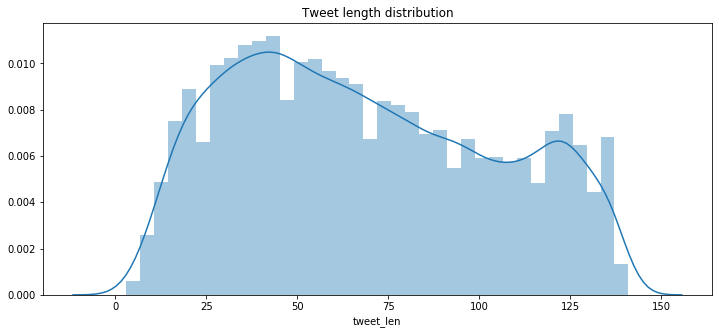

In [16]:
lens = train['tweet_len']
plt.figure(figsize=(12, 5));
print (max(lens), min(lens), np.mean(lens))
sns.distplot(lens);
plt.title('Tweet length distribution')

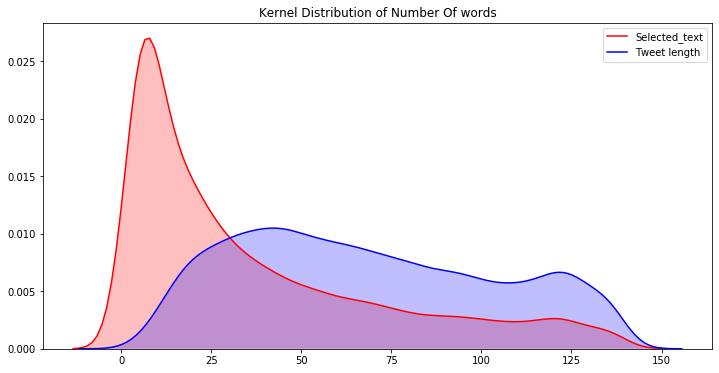

In [37]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['len'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['tweet_len'], shade=True, color="b")
plt.legend(labels=["Selected_text","Tweet length"])


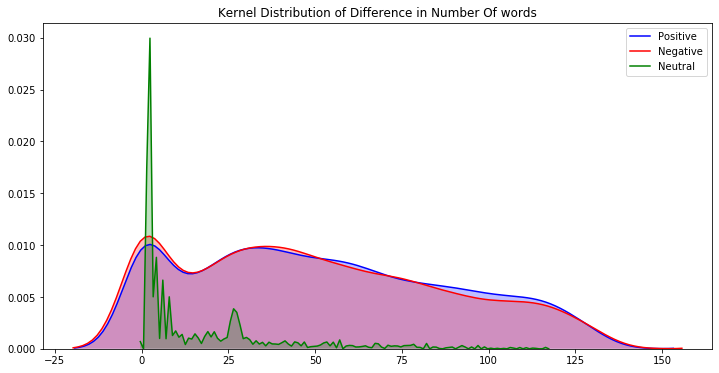

In [18]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(pos['diff'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(neg['diff'], shade=True, color="r")
p3=sns.kdeplot(neutral['diff'], shade=True,color='g')
plt.legend(labels=["Positive","Negative","Neutral"])

In [19]:
from collections import Counter
lis = train['selected_text'].apply(lambda x:str(x).split())
count = Counter([item for sublist in lis for item in sublist])
most = count.most_common(20)   

print(most) 

[('to', 5190), ('I', 4842), ('the', 4303), ('a', 3427), ('my', 2503), ('i', 2298), ('and', 2164), ('you', 2072), ('is', 1944), ('in', 1864), ('for', 1821), ('it', 1636), ('of', 1611), ('on', 1358), ('have', 1226), ('me', 1187), ('so', 1165), ('that', 1077), ('be', 1047), ('but', 1043)]


In [20]:
#counting urls present in selected text
def urls(string): 
    url = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', string)
    return "".join(url) 
train['url']=train['selected_text'].apply(lambda x: urls(x))
url_count=train.loc[train['url']!=""]['sentiment'].value_counts()
print(url_count)

neutral     345
positive      3
negative      3
Name: sentiment, dtype: int64


In [21]:
train['tweet_url']=train['text'].apply(lambda x: urls(x))
url_count=train.loc[train['tweet_url']!=""]['sentiment'].value_counts()
print(url_count)

neutral     579
positive    409
negative    233
Name: sentiment, dtype: int64


In [22]:
#presense of stars in train data
def stars(text):
    line=re.findall(r'[*]{2,5}',text)
    return len(line)

train['star']=train['selected_text'].apply(lambda x:stars(x))
train.loc[train['star']!=0]['sentiment'].value_counts().to_frame()

sentiment
negative        317
neutral         248
positive         50

In [23]:
#presense of stars in test data

train['tweet_star']=train['text'].apply(lambda x:stars(x))
train.loc[train['tweet_star']!=0]['sentiment'].value_counts().to_frame()

sentiment
negative        538
neutral         263
positive        218

In [24]:
def count(df,feature):
    total=df.loc[:,feature].value_counts(dropna=False)
    percent=round(df.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percent],axis=1,keys=['Total','Percent'])


In [25]:
#counting sentiments in train data
count(train,'sentiment')

Total  Percent
neutral   11117    40.45
positive   8582    31.23
negative   7781    28.32

In [26]:
#counting sentiments in test data

count(test,'sentiment')

Total  Percent
neutral    1430    40.46
positive   1103    31.21
negative   1001    28.32

In [27]:
#topmost selected text for positive tweets

t=count(pos,'selected_text')
t.head(10)

Total  Percent
good      198     2.31
love      185     2.16
Happy     163     1.90
happy     105     1.22
thanks     98     1.14
great      90     1.05
Thanks     82     0.96
fun        69     0.80
nice       64     0.75
Good       59     0.69

In [28]:
#topmost selected text for negative tweets

t=count(neg,'selected_text')
t.head(10)

Total  Percent
miss     143     1.84
sad       89     1.14
sorry     81     1.04
hate      70     0.90
****      63     0.81
bad       62     0.80
tired     44     0.57
sick      43     0.55
hurts     36     0.46
sucks     34     0.44

In [29]:
#topmost selected text for neutral tweets

t=count(neutral,'selected_text')
t.head(10)

Total  Percent
I see                                                   2     0.02
Why?                                                    2     0.02
I`m at work                                             2     0.02
morning                                                 2     0.02
aw                                                      2     0.02
salt and vinegar                                        2     0.02
nup no cd either.. just a whole bunch of zeros ...      1     0.01
does it work on the iPhone as my MacBook is flat        1     0.01
I am down  I need my snuggles but he is at work...      1     0.01
I`ve always said to PD that I wanted a kitchen ...      1     0.01

In [30]:
fig = go.Figure()
fig.add_trace(go.Box(x=train[train['sentiment']=='neutral']['tweet_len'],name="Neutral",marker_color='orange',boxmean='sd'))
fig.add_trace(go.Box(x=train[train['sentiment']=='negative']['tweet_len'],name="Negative",marker_color='red',boxmean='sd'))
fig.add_trace(go.Box(x=train[train['sentiment']=='positive']['tweet_len'],name="Positive",marker_color='green',boxmean='sd'))

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(
    title_text='Text Length', 
    xaxis_title_text='Length', 
    yaxis_title_text='Count', 
    title_x=0.5
)

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [31]:
n_neu=neutral.shape[0]
n_pos=pos.shape[0]
n_neg=neg.shape[0]

sentiments = ['Neutral', 'Positive', 'Negative']
fig = go.Figure(data = [go.Pie(labels = sentiments, values=[n_neu, n_pos, n_neg])])
fig.show()

There are 1905188 words in the combination of all review.


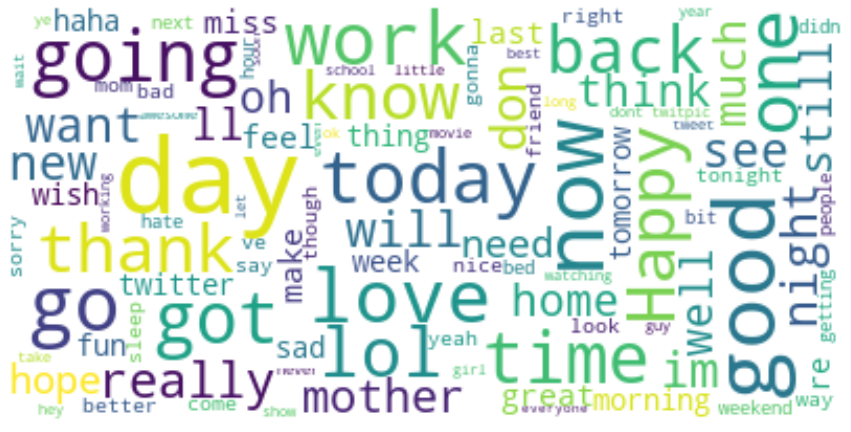

In [32]:
def wordcloud(df):
    
    # Join all tweets in one string
    corpus = " ".join(str(review) for review in df['text'])
    print (f"There are {len(corpus)} words in the combination of all review.")
    
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100,
                          collocations = False,
                          background_color="white").generate(corpus)
    
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

wordcloud(train)

There are 612918 words in the combination of all review.


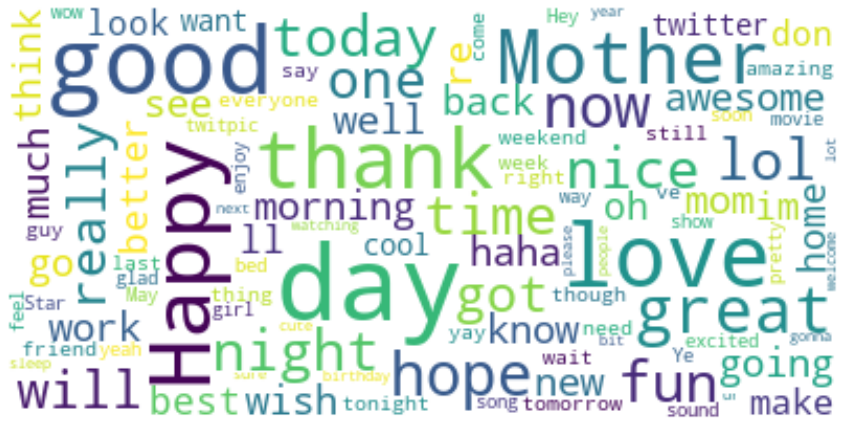

In [33]:
wordcloud(pos)

There are 556248 words in the combination of all review.


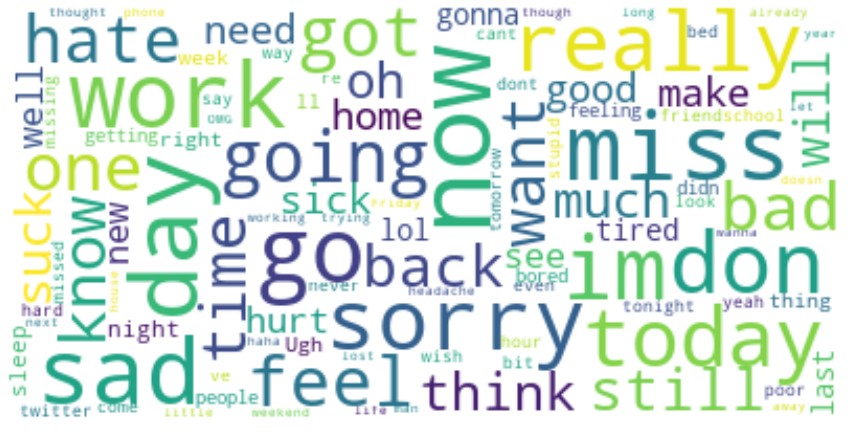

In [34]:
wordcloud(neg)

There are 736020 words in the combination of all review.


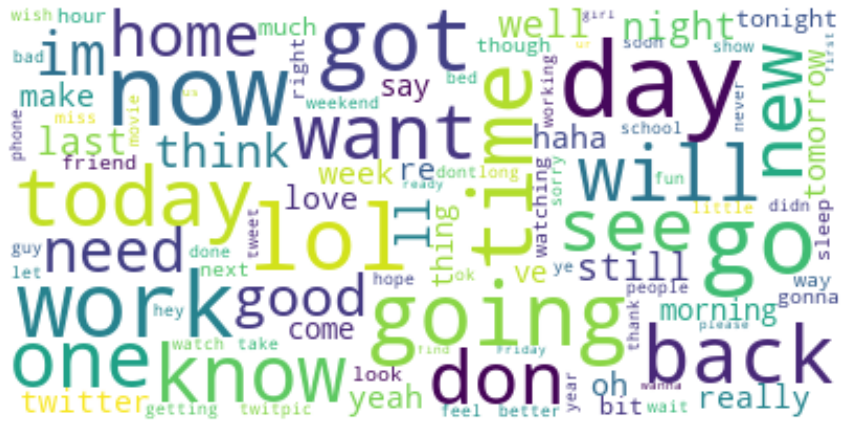

In [35]:
wordcloud(neutral)